# Machine Learning
This code presents the process carried out to generate the ML models as well as observe their performance.

### Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import glob
import itertools
from sklearn.model_selection import cross_val_score

## Data Preparation

### Loading clean data available in filter data folder

In [3]:
# Specify the event to make a Machine Learning algorithm
# TODO: uncomment to select specific event "sudden-acc", "sudden-brake", "line-chg", "turn"
event_safe = 'safe'
# event = 'sudden-acc'
# event = 'sudden-brake' 
# event = 'sudden-left-line' 
# event = 'sudden-right-line' 
# event = 'sudden-left-turn' 
event = 'sudden-right-turn' 

file_path = './filter_data'

files_to_read = glob.glob('{}\*{}*.csv'.format(file_path, event)) + glob.glob('{}\*{}*.csv'.format(file_path, event_safe))
# Create Dataframe for the event
df = pd.DataFrame()
i = 0
for file in files_to_read[:]:
    i += 1
    df = pd.concat([df, pd.read_csv(file)])

# Number of files for this data
print("Total files: ", i)

Total files:  8


Checking the contents of uploaded files

In [16]:
# Show dataframe
df.head().transpose()

,0,1,2,3,4
sr_no,1,2,3,4,5
timestamp,20-2-2023_14:51:17:23368,20-2-2023_14:51:17:449670,20-2-2023_14:51:17:460620,20-2-2023_14:51:17:468617,20-2-2023_14:51:17:492618
road_type,paved,paved,paved,paved,paved
harsh_event,sudden-acceleration,sudden-acceleration,sudden-acceleration,sudden-acceleration,sudden-acceleration
acc_x,-1.322198,-1.318977,-1.119628,-1.234793,-1.022769
acc_y,-2.060521,-2.137586,-2.228347,-1.904228,-1.63704
acc_z,1.115481,1.21537,0.962362,0.311886,-0.266723
gyro_x,-0.023505,-0.013133,-0.032336,-0.037588,-0.041135
gyro_y,0.000791,-0.006419,-0.005758,0.001407,0.000697
gyro_z,-0.014409,-0.012537,-0.017971,-0.020532,-0.02033


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sr_no,11229.0,430.488735,352.381027,1.000000,166.000000,332.000000,608.000000,1648.000000
acc_x,11229.0,-0.338375,0.957277,-12.285364,-0.821664,-0.357365,0.164841,9.329324
acc_y,11229.0,-0.630757,1.387034,-11.102222,-1.390381,-0.647464,0.208900,6.126020
acc_z,11229.0,-0.292454,1.609527,-15.003558,-1.165189,-0.349661,0.598953,12.923087
gyro_x,11229.0,-0.047079,0.041122,-0.403313,-0.070330,-0.046429,-0.023384,0.262760
gyro_y,11229.0,0.003761,0.047013,-0.275878,-0.019854,0.002975,0.027863,0.440760
gyro_z,11229.0,0.003195,0.014383,-0.105918,-0.004493,0.002324,0.010904,0.189433
mag_x,11229.0,0.493220,0.189992,0.000000,0.363636,0.500000,0.625000,1.000000
mag_y,11229.0,0.502626,0.185034,0.000000,0.400000,0.500000,0.600000,1.000000
mag_z,11229.0,0.504146,0.178833,0.000000,0.375000,0.500000,0.625000,1.000000


In [4]:
# Check data
print("All data size: ", df.shape)
print("There are " + str(len(df)) + " observations in the " + event + " driving dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")
print("Harsh drive event data size: ", df["event_class"][df["event_class"] == 1].shape)
print("Safe drive event data size: ", df["event_class"][df["event_class"] == 0].shape)

All data size:  (6326, 14)
There are 6326 observations in the sudden-right-turn driving dataset.
There are 14 variables in the dataset.
Harsh drive event data size:  (582,)
Safe drive event data size:  (5744,)


In [5]:
#Get the set of distinct classes
labels = df.event_class.unique()
labels

array([0, 1], dtype=int64)

In [6]:
#Get the count of each class
sizes = df.event_class.value_counts().values
sizes

array([5744,  582], dtype=int64)

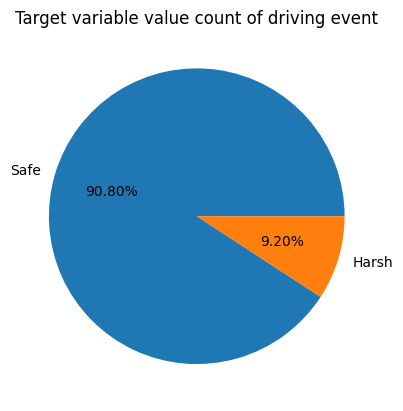

In [7]:
# plot the class value counts
label = {'Safe' : labels[0], 'Harsh': labels[1]}
fig, ax = plt.subplots()
ax.pie(sizes, labels=label, autopct='%1.2f%%')
ax.set_title("Target variable value count of driving event")
plt.show()

## Feature selection process

In [8]:
# TODO: uncomment the code regarding the type of event to execute

# total_features = ["timestamp","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","mag_x","mag_y","mag_z","event_class"]
# event_features = ["acc_y"] # fro Sudden Acceleration and Sudden Braking 
# event_features = ["acc_x", "gyro_z"] # for Sudden left and right line change
event_features = ["acc_x" ,"acc_y", "gyro_z", "mag_x", "mag_y"] # for Sudden left and right turn 

# Features selection
event_features_label = ["sr_no", *event_features,  "event_class"]
dataset = df[event_features_label].to_numpy()
print("All data shape for the selected features: ",dataset.shape)

All data shape for the selected features:  (6326, 7)


## Sliding window process

In [9]:
def sliding_windows(dataset, window_size = 10, event_features="X"):
    """Create a sliding window with a defined window size and return the calculation for each record inside the sliding window.

    The calculations made are for each time window: 
    - The mean.
    - The median.
    - The standard deviation.
    - The maximum and minimum value.
    - The trend.

    Args:
        dataset (numpy.array): An array with the data taken on a vehicle trip, 
        composed for rows: dataset registers and columns: first data index, and subsequent dataset event features.
        window_size (int, optional): number Number of registers contained in the time window. Defaults to 10.
        event_features (str, optional): _description_. Defaults to "X".

    Returns:
        tuple: A tuple structured like this: (sliding window id, sliding window featured data, sliding window label data, features name)
    """
    sld_window = np.lib.stride_tricks.sliding_window_view(dataset, window_size, axis=0) #[::1, :] Add this for define window step
    # print(f"\nSize of Sliding windows\nData: {sld_window.shape[0]}, Features: {sld_window.shape[1]}, Window size: {sld_window.shape[2]}")

    # Splitting in dataset id data having all rows, only sr_id column, and window size
    id = sld_window[:,0:1,:]
    # Get the id of first window and last window, vary with window size
    sld_window_id = np.concatenate((id[:,:,0], id[:,:,-1]), axis=1) 

    # Splitting the dataset (features, label)
    separator = dataset.shape[1] - 1 # Removing the last column corresponding to the event_class 
    features_data = sld_window[:, 1:separator, :] # All rows, feature columns, and sliding window size
    print(f"\nSize of feature_data used in Sliding window processing\nData: {features_data.shape[0]}, Features: {features_data.shape[1]}, Window size: {features_data.shape[2]}")
    label_data = sld_window[:, separator, :] # Get the labels of the data in every sliding window

    # Processing the sliding window
    # Get the mean, median, std, max and min value
    mean = features_data.mean(axis = 2)
    median = np.median(features_data, axis = 2)
    std = features_data.std(axis = 2)
    max_val = features_data.max(axis = 2)
    min_val = features_data.min(axis = 2)
    # Get tendency, which is the current value divided by the previous value.
    # Taking the mean value of the first record in the sliding window and all previous mean values.
    divider = np.array([mean[0], *mean[:-1]])
    # Dividing the mean array by the divider array. 
    trend = mean/np.where(divider == 0, 1, divider) # Replace any zero value in the divider array with 1.
    label = st.mode(label_data, axis = 1, keepdims = True)[0]

    # Concatenate processed sliding window
    sld_window_features = np.concatenate((mean, median, std, max_val, min_val, trend), axis=1)
    print(f"\nFinal size of Sliding window features after processing\nData: {sld_window_features.shape[0]}, Features: {sld_window_features.shape[1]}")

    # Reshape label for sklearn standard
    label = label.reshape(label.shape[0])
    # print(label.shape)

    # Make the features names
    e_n = len(event_features) # Events number
    measurements_names = [["mean"]*e_n, ["median"]*e_n, ["std"]*e_n, ["max_val"]*e_n, ["min_val"]*e_n, ["trend"]*e_n]
    measurements_names = list(itertools.chain(*measurements_names))
    events_names = event_features*(len(measurements_names)//e_n)

    sld_window_features_names = list(map('_'.join, zip(measurements_names, events_names)))
    print(f"\n{sld_window_features.shape[1]} features generated after sliding window process\n",sld_window_features_names)

    return (sld_window_id, sld_window_features, label, sld_window_features_names)

# TODO: Define windows size
window_size = 50

# Do the feature extraction process
ids, features, target, features_names = sliding_windows(dataset, window_size, event_features)



Size of feature_data used in Sliding window processing
Data: 6277, Features: 5, Window size: 50

Final size of Sliding window features after processing
Data: 6277, Features: 30

30 features generated after sliding window process
 ['mean_acc_x', 'mean_acc_y', 'mean_gyro_z', 'mean_mag_x', 'mean_mag_y', 'median_acc_x', 'median_acc_y', 'median_gyro_z', 'median_mag_x', 'median_mag_y', 'std_acc_x', 'std_acc_y', 'std_gyro_z', 'std_mag_x', 'std_mag_y', 'max_val_acc_x', 'max_val_acc_y', 'max_val_gyro_z', 'max_val_mag_x', 'max_val_mag_y', 'min_val_acc_x', 'min_val_acc_y', 'min_val_gyro_z', 'min_val_mag_x', 'min_val_mag_y', 'trend_acc_x', 'trend_acc_y', 'trend_gyro_z', 'trend_mag_x', 'trend_mag_y']


Checking feature dataframe

In [10]:
print("Features shape:", features.shape)
print("\nFeatures size for harsh drive event: ", np.where(target == 1)[0].shape)
print("Features size for safe drive event: ", np.where(target == 0)[0].shape)

print("\nSample of features: ")
x_df = pd.DataFrame(features, columns=features_names)
x_df[["first_id","last_id"]] = ids
x_df.set_index(["first_id","last_id"], inplace=True)
x_df

Features shape: (6277, 30)

Features size for harsh drive event:  (578,)
Features size for safe drive event:  (5699,)

Sample of features: 


,,mean_acc_x,mean_acc_y,mean_gyro_z,mean_mag_x,mean_mag_y,median_acc_x,median_acc_y,median_gyro_z,median_mag_x,median_mag_y,...,min_val_acc_x,min_val_acc_y,min_val_gyro_z,min_val_mag_x,min_val_mag_y,trend_acc_x,trend_acc_y,trend_gyro_z,trend_mag_x,trend_mag_y
first_id,last_id,,,,,,,,,,,,,,,,,,,,,
1.0,50.0,-0.640745,-0.705491,-0.007221,0.668800,0.954146,-0.543213,-0.600133,-0.000616,0.680000,0.951220,...,-1.867640,-2.067851,-0.226494,0.560000,0.878049,1.000000,1.000000,1.000000,1.000000,1.000000
2.0,51.0,-0.647641,-0.694470,-0.007403,0.672000,0.952683,-0.543213,-0.600133,-0.000842,0.680000,0.951220,...,-1.867640,-2.067851,-0.226494,0.560000,0.878049,1.010762,0.984378,1.025261,1.004785,0.998466
3.0,52.0,-0.654344,-0.681171,-0.007581,0.675200,0.951220,-0.552770,-0.600133,-0.001136,0.680000,0.951220,...,-1.867640,-2.067851,-0.226494,0.600000,0.878049,1.010350,0.980850,1.023994,1.004762,0.998464
4.0,53.0,-0.669250,-0.660309,-0.007687,0.676000,0.951707,-0.569796,-0.600133,-0.001274,0.680000,0.951220,...,-1.867640,-2.067851,-0.226494,0.600000,0.878049,1.022781,0.969373,1.014000,1.001185,1.000513
5.0,54.0,-0.689476,-0.630256,-0.007829,0.676800,0.952195,-0.598368,-0.600133,-0.001274,0.680000,0.951220,...,-1.867640,-2.067851,-0.226494,0.600000,0.878049,1.030222,0.954486,1.018433,1.001183,1.000513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430.0,479.0,-0.552293,-0.891569,-0.000079,0.637778,0.382222,-0.542936,-0.894916,-0.000063,0.666667,0.444444,...,-0.666652,-1.127032,-0.002043,0.333333,0.000000,1.000196,1.001681,0.946534,1.010563,0.988506
431.0,480.0,-0.550996,-0.888858,-0.000032,0.644445,0.377778,-0.541516,-0.894916,0.000012,0.666667,0.444444,...,-0.666652,-1.127032,-0.002043,0.333333,0.000000,0.997653,0.996959,0.400440,1.010453,0.988372
432.0,481.0,-0.552667,-0.884182,-0.000005,0.648889,0.384444,-0.541516,-0.893822,0.000012,0.666667,0.444444,...,-0.666652,-1.037134,-0.002043,0.333333,0.000000,1.003032,0.994740,0.166022,1.006897,1.017647


## Machine Learning Process
Create the different machine learning models through the sklearn libraries

In [11]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Splitting data in ratio of 70/30, 70% for training and 30% for testing 
x_train, x_test, y_train, y_test = train_test_split(x_df, target, test_size=0.3, train_size=0.7, random_state=300, shuffle=True)

print("Training feature shape:", x_train.shape)
print("Training target shape:", y_train.shape)
print("Harsh drive event train feature size: ", np.where(y_train == 1)[0].shape)
print("Safe drive event train feature size: ", np.where(y_train == 0)[0].shape)

print("\nTesting feature shape:", x_test.shape)
print("Testing target shape:", y_test.shape)
print("Harsh drive event test feature size: ", np.where(y_test == 1)[0].shape)
print("Safe drive event test feature size: ", np.where(y_test == 0)[0].shape)

Training feature shape: (4393, 30)
Training target shape: (4393,)
Harsh drive event train feature size:  (394,)
Safe drive event train feature size:  (3999,)

Testing feature shape: (1884, 30)
Testing target shape: (1884,)
Harsh drive event test feature size:  (184,)
Safe drive event test feature size:  (1700,)


### Support Vector Machines

In [152]:
SVM = svm.SVC(C = 10, gamma = 1, kernel = 'rbf', probability = True)
SVM.fit(x_train, y_train)

SVC(C=10, gamma=1, probability=True)

### Decision Trees

In [153]:
DT = tree.DecisionTreeClassifier(criterion = "gini")
DT.fit(x_train, y_train)

# print(DT.get_depth(), DT.get_n_leaves())

7 22


### Random forest

In [154]:
RF = RandomForestClassifier(n_estimators = 300)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

### Plot the important Random forest features

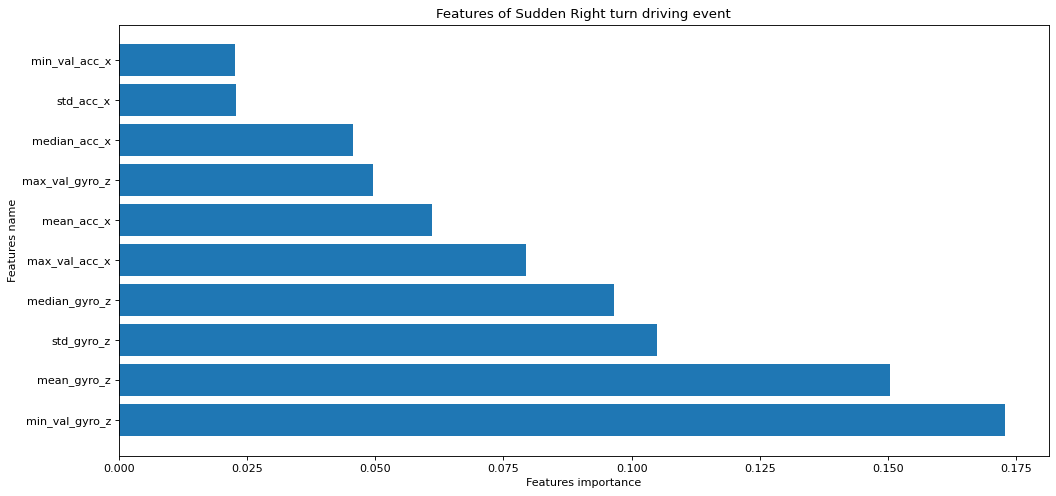

In [155]:
# Check more significant variables
def plot_feature_importances(dt, features_names, top_n=10):
    
    if len(features_names) < 10 :
        
        df_features = len(features_names)
        plt.barh(range(df_features), dt.feature_importances_)
        plt.title("Features of Sudden Right turn driving event")
        plt.xlabel("Features importance")
        plt.ylabel("Features name")
        plt.yticks(np.arange(df_features), features_names)

    else:
        # Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
        
        importances = dt.feature_importances_
        # get indices of top n features
        indices = np.argsort(importances)[::-1][:top_n] 
        plt.barh(range(top_n), importances[indices])
        plt.title("Features of Sudden Right turn driving event")
        plt.xlabel("Features importance")
        plt.ylabel("Features name")
        plt.yticks(range(top_n), np.array(features_names)[indices])

plt.figure(figsize = (15,7), dpi = 80)
# Out of all features plot only 6 significant features
plot_feature_importances(RF, features_names, top_n=10)
plt.show()


### Test ML algorithm

* Accuracy = TP + TN / (TP + TN + FP + FN)
* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
* f1 = 2 * Precision * Recall / (Precision + Recall)


In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from collections import Counter

for model in (SVM, DT, RF):
    prediction = model.predict(x_test)
    prediction_proba = model.predict_proba(x_test)[:,1]
    # print(prediction_proba)
    print("\nClassifier Name: ",model.__class__.__name__)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, prediction)))
    print('Precision: {:.2f}'.format(precision_score(y_test, prediction)))
    print('Recall: {:.2f}'.format(recall_score(y_test, prediction)))
    print('F1: {:.2f}'.format(f1_score(y_test, prediction)))
    print('AUC: {:.2f}'.format(roc_auc_score(y_test, prediction_proba)))
    print("Count total data predicted: Harsh Drive = {}, Safe Drive = {}".format(Counter(prediction)[1], Counter(prediction)[0]))


Classifier Name:  SVC
Accuracy: 0.99
Precision: 1.00
Recall: 0.93
F1: 0.97
AUC: 1.00
Count total data predicted: Harsh Drive = 172, Safe Drive = 1712

Classifier Name:  DecisionTreeClassifier
Accuracy: 1.00
Precision: 0.99
Recall: 0.98
F1: 0.99
AUC: 0.99
Count total data predicted: Harsh Drive = 182, Safe Drive = 1702

Classifier Name:  RandomForestClassifier
Accuracy: 1.00
Precision: 0.99
Recall: 0.99
F1: 0.99
AUC: 1.00
Count total data predicted: Harsh Drive = 184, Safe Drive = 1700


### Confusion matrix


Classifier Name:  SVC


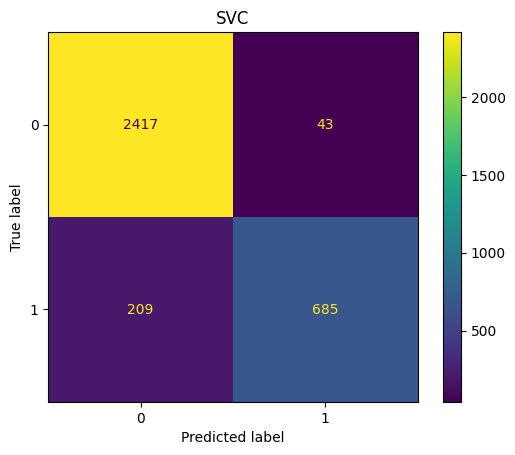


Classifier Name:  DecisionTreeClassifier


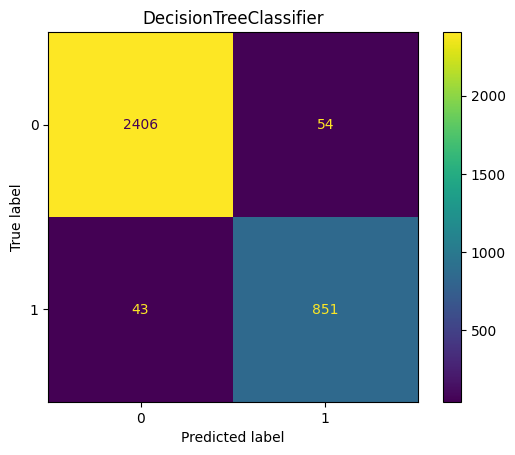


Classifier Name:  RandomForestClassifier


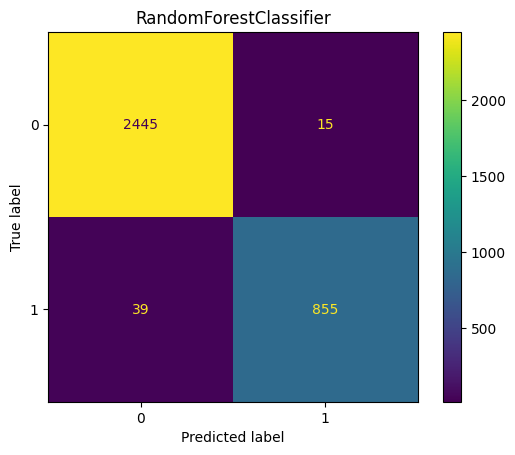

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for model in (SVM, DT, RF):
    print("\nClassifier Name: ",model.__class__.__name__)
    head = model.__class__.__name__
    prediction = model.predict(x_test)
    cf_matrix = confusion_matrix(y_test, prediction)
    # print(y_validation, prediction)
    display = ConfusionMatrixDisplay(cf_matrix)
    display.plot()
    plt.title(head)
    plt.show()

### Roc curves and Area Under Curve (AUC)

In [45]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, x_test, y_test):
    """Make a roc curve graph

    Args:
        clf (sklearn clf): The classifier to plot
        x_test (np.array): X test data
        y_test (np.array): Y test data
    """
    model_name = "".join(c for c in model.__class__.__name__ if c.isupper())
    y_score = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    # print("False positive rate: {}, True positive rate: {}".format(fpr, tpr))
    roc_auc = auc(fpr, tpr)
    accuracy = model.score(x_test, y_test)
    plt.plot(fpr, tpr, lw = 2, alpha = 0.7, label = 'Algorithm {} (accuracy = {:.2f}, area = {:.2f})'.format(model_name, accuracy, roc_auc))

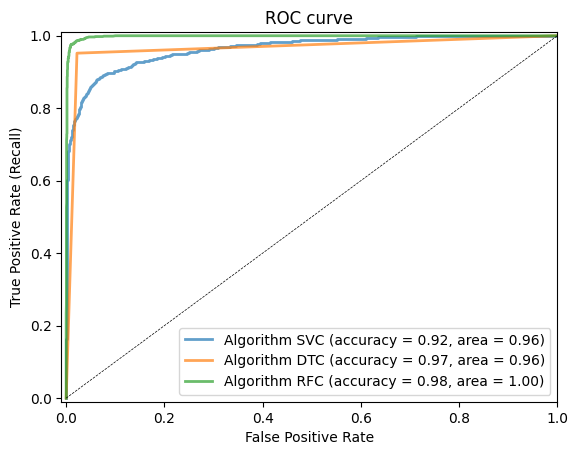

In [46]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

for model in (SVM, DT, RF):
    plot_roc_curve(model, x_test, y_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.plot([0, 1], [0, 1], color = 'k', lw = 0.5, linestyle = '--')
plt.legend(loc = "lower right")
plt.title('ROC curve')
plt.show()

### Classifier optimization process

In [47]:
print("\nParameters SVM: ", SVM.get_params())
print("\nParameters DT: ", DT.get_params())
print("\nParameters RF: ", RF.get_params())


Parameters SVM:  {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Parameters DT:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Parameters RF:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

x_train, x_test, y_train, y_test = train_test_split(x_df, target, test_size = 0.3, train_size = 0.7, random_state = 160, shuffle = True)
# TODO: Uncomment the classifier to process
# model = svm.SVC(kernel = 'rbf')
# model = tree.DecisionTreeClassifier(criterion = "gini")
model = RandomForestClassifier(n_jobs=2)

split = KFold(n_splits = 5, shuffle = True, random_state = 320)

# TODO: Uncomment the grid value according to the classifier
# grid_values = {'C': [0.01, 0.05, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10], 'class_weight': [None, 'balanced']} # SVM case
# grid_values = {'max_depth':[2,3,4,5,6,7,8,9,10], 'max_leaf_nodes': [5,6,10,15,20,25,30,40,50,60], 'class_weight': [None, 'balanced']} # DT case
grid_values = {'max_samples':[0.9, 0.95, None], 'n_estimators': [100, 200, 300], 'class_weight': [None, 'balanced']} # RF case

scores = ['f1', 'precision', 'recall', 'roc_auc']
for score in scores:
    grid_model = GridSearchCV(model, param_grid = grid_values, cv = split, scoring = score)
    grid_model.fit(x_df, target)
    print('\n\nBest parameter (max. {}): {}'.format(score, grid_model.best_params_))
    print('Best score ({}): {:.2f}'.format(score, grid_model.best_score_))




Best parameter (max. f1): {'class_weight': None, 'max_samples': None, 'n_estimators': 300}
Best score (f1): 0.98


Best parameter (max. precision): {'class_weight': 'balanced', 'max_samples': 0.9, 'n_estimators': 100}
Best score (precision): 0.99


Best parameter (max. recall): {'class_weight': None, 'max_samples': None, 'n_estimators': 200}
Best score (recall): 0.98


Best parameter (max. roc_auc): {'class_weight': 'balanced', 'max_samples': None, 'n_estimators': 300}
Best score (roc_auc): 1.00


### Evaluate the performance of the optimized classifier

In [157]:
# TODO: Uncomment the classifier to check
# model = svm.SVC(C= 100, gamma= 0.01, kernel='rbf', probability=True) 
# model = tree.DecisionTreeClassifier(criterion = "gini", class_weight=None, max_depth=4, max_leaf_nodes=30)
model = RandomForestClassifier(n_jobs=2, class_weight=None, max_samples=None, n_estimators=300)

cv = KFold(n_splits=5, shuffle=True, random_state=320)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=150)
# cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=5) 
# cv = StratifiedShuffleSplit(n_splits=5)

print("\nEstimator: ",model.__class__.__name__)
print('Cross-validation (accuracy)', "%.3f" %cross_val_score(model, x_df, target, cv=cv).mean())
print('Cross-validation (F1)', "%.3f" %cross_val_score(model, x_df, target, cv=cv, scoring = 'f1').mean())
print('Cross-validation (precision)', "%.3f" %cross_val_score(model, x_df, target, cv=cv, scoring = 'precision').mean())
print('Cross-validation (recall)', "%.3f" %cross_val_score(model, x_df, target, cv=cv, scoring = 'recall').mean())
print('Cross-validation (AUC)', "%.3f" %cross_val_score(model, x_df, target, cv=cv, scoring = 'roc_auc').mean())


Estimator:  RandomForestClassifier
Cross-validation (accuracy) 0.999
Cross-validation (F1) 0.993
Cross-validation (precision) 0.995
Cross-validation (recall) 0.991
Cross-validation (AUC) 1.000


In [158]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)
prediction_proba = model.predict_proba(x_test)

In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, target_names=['Safe Drive', 'Harsh Drive']))

              precision    recall  f1-score   support

  Safe Drive       1.00      1.00      1.00      1700
 Harsh Drive       0.99      0.99      0.99       184

    accuracy                           1.00      1884
   macro avg       1.00      1.00      1.00      1884
weighted avg       1.00      1.00      1.00      1884



## Generate ML model
To generate the model, the optimized parameters of the classifier and the optimization performance scores file were taken as a basis.

The total number of models generated was 6, due to each of the driving events carried out.

In [160]:
from joblib import dump
model_name = 'model_sudden_right_turn'
dump(model, str(model_name+'.joblib'))

['model_sudden_right_turn.joblib']